# 6.5 k-Means Cluster Anlaysis

## Table of Contents
### 1. Import Libraries and Data

### 1. Import Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [6]:
# Define Path
path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis'

# Import Sales Invoice Extended Data
invoice_file_path = os.path.join(path, '02 Data', 'Prepared Data', '6.4', 'invoice_enriched_ext.csv')
invoice_ext = pd.read_csv(invoice_file_path)

# check output
invoice_ext.head()

,invoice_number,Date,Company_Name,Brand_Name,Total,Customer_Category,Trade_Type,Total_Quantity,Country,Total_USD
0,000030-024170-20240508-000447,2024-05-08,marina bay sands,MBS,7740.0,Hotel,Export,516.0,Singapore,7740.0
1,00003093043220250310000023,2025-03-10,"cprc (maldives) pvt, ltd (ritz carlton maldives)",Ritz Carlton Maldives,2150.0,Hotel,Export,225.0,Maldives,2150.0
2,004817#08010000025220250201000912,2025-02-01,al ghalia w.l.l,Jihad,1016.6,Agent,Export,60.0,Bahrain,1016.6
3,005/KEVALA/OUT/III/2024,2024-06-01,six senses amaala,Amaala,596.5,Hotel,Export,50.0,Saudi Arabia,596.5
4,006830#00003002238320250212043298,2025-02-13,renarte general trading llc,Renarte,984.0,Agent,Export,48.0,United Arab Emirates,984.0


### 2. Cleaning, Manipulations, and Reprocessing

In [11]:
# Keep only the numeric features for clustering
invoice_numeric = invoice_ext[['Total_USD', 'Total_Quantity']].copy()

# Drop any rows with missing or zero values
invoice_numeric.dropna(inplace=True)
invoice_numeric = invoice_numeric[(invoice_numeric['Total_USD'] > 0) & (invoice_numeric['Total_Quantity'] > 0)]


In [13]:
# Standardise data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
invoice_scaled = scaler.fit_transform(invoice_numeric)

# Convert back to DataFrame for readability
invoice_scaled_df = pd.DataFrame(invoice_scaled, columns=['Total_USD_scaled', 'Total_Quantity_scaled'])
invoice_scaled_df.head()


,Total_USD_scaled,Total_Quantity_scaled
0,0.986780,0.746015
1,0.114452,0.199117
2,-0.062417,-0.110980
3,-0.127974,-0.129774
4,-0.067504,-0.133533


### 3. Use the Elbow Technique to Determine Optimal k

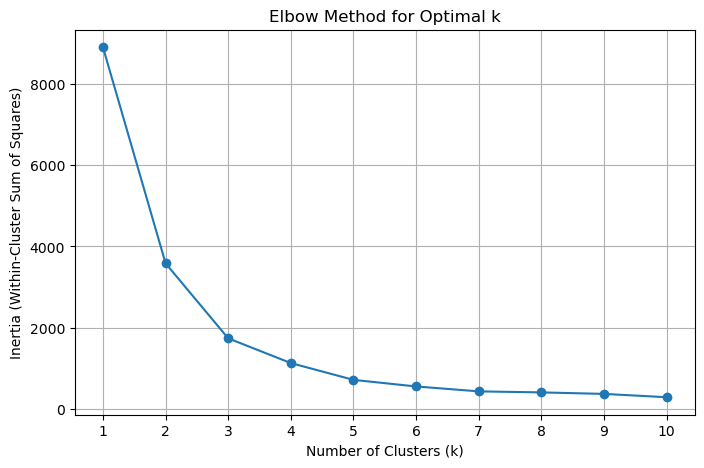

In [16]:
# Try cluster sizes from 1 to 10
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(invoice_scaled_df)
    inertia.append(kmeans.inertia_)

import os

# Define save path
save_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\04 Analysis\Visualisations\6.5'
elbow_plot_file = os.path.join(save_path, 'elbow_plot_kmeans.png')

# Plot and save elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.savefig(elbow_plot_file, dpi=300, bbox_inches='tight')
plt.show()


#### Optimal Number of Clusters (k) – Elbow Method

Based on the elbow plot of the within-cluster sum of squares (WCSS), the optimal number of clusters appears to be **3 or 4**.

- At k = 3, there's a steep drop in inertia compared to k = 2.
- At k = 4, the reduction in inertia starts to flatten, suggesting diminishing returns beyond this point.
- After k = 4, the improvements in cluster compactness become marginal.

We will proceed with **k = 4**, as it balances interpretability and clustering quality.


### 4. k-Means Algorithm

In [21]:
# Set number of clusters
k = 4

# Fit KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
invoice_scaled_df['Cluster'] = kmeans.fit_predict(invoice_scaled_df)

# Preview cluster assignments
invoice_scaled_df.head()

,Total_USD_scaled,Total_Quantity_scaled,Cluster
0,0.986780,0.746015,3
1,0.114452,0.199117,0
2,-0.062417,-0.110980,0
3,-0.127974,-0.129774,0
4,-0.067504,-0.133533,0


In [27]:
# Recreate the cleaned numeric version of invoice_ext used for clustering
invoice_clean = invoice_ext[['Total_USD', 'Total_Quantity']].copy()
invoice_clean = invoice_clean[(invoice_clean['Total_USD'] > 0) & (invoice_clean['Total_Quantity'] > 0)].reset_index(drop=True)

# Add the cluster column to this cleaned version
invoice_clean['Cluster'] = invoice_scaled_df['Cluster'].values

# Preview the result
invoice_clean.head()


,Total_USD,Total_Quantity,Cluster
0,7740.0,516.0,3
1,2150.0,225.0,0
2,1016.6,60.0,0
3,596.5,50.0,0
4,984.0,48.0,0


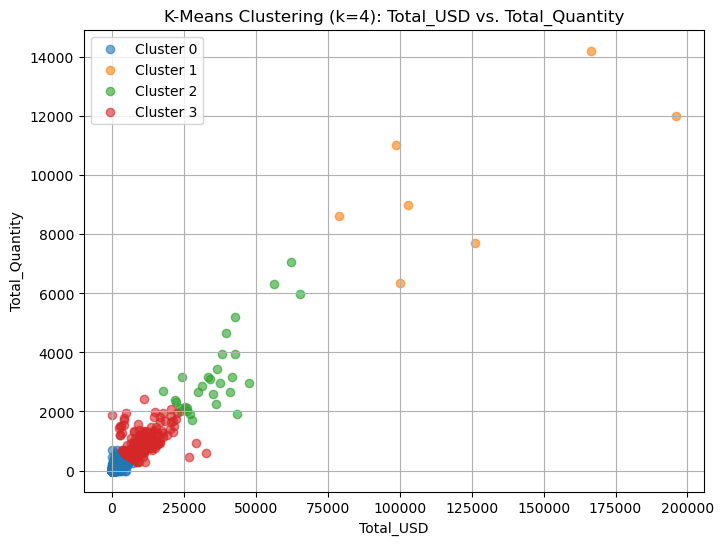

In [29]:
# Save viz
scatter_file = os.path.join(save_path, 'scatter_clusters_totalUSD_vs_quantity.png')

# Create scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in sorted(invoice_clean['Cluster'].unique()):
    cluster_data = invoice_clean[invoice_clean['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Total_USD'],
        cluster_data['Total_Quantity'],
        label=f'Cluster {cluster_id}',
        alpha=0.6
    )

plt.title('K-Means Clustering (k=4): Total_USD vs. Total_Quantity')
plt.xlabel('Total_USD')
plt.ylabel('Total_Quantity')
plt.legend()
plt.grid(True)
plt.savefig(scatter_file, dpi=300, bbox_inches='tight')
plt.show()


C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\629346351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean, x='Cluster', y='Total_Quantity', palette='tab10')


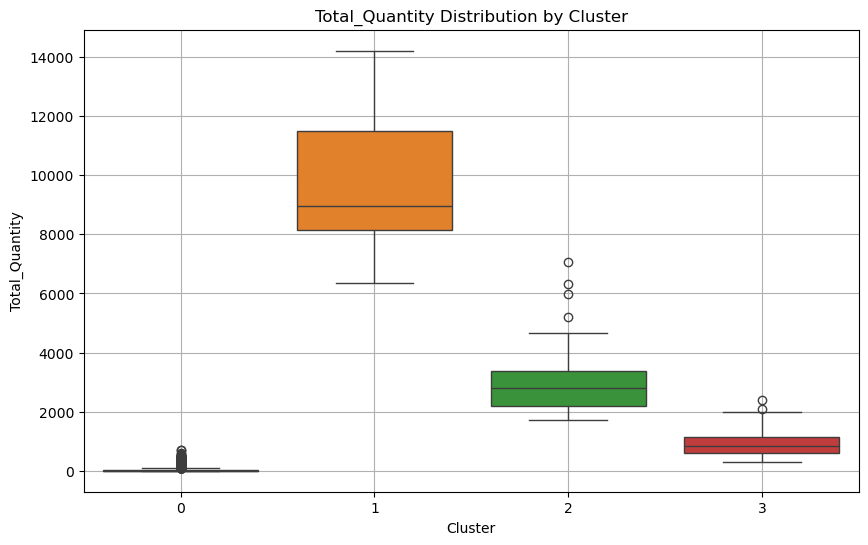

In [33]:
# Define save path
boxplot_file = os.path.join(save_path, 'boxplot_totalQuantity_by_cluster.png')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=invoice_clean, x='Cluster', y='Total_Quantity', palette='tab10')
plt.title('Total_Quantity Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total_Quantity')
plt.grid(True)
plt.savefig(boxplot_file, dpi=300, bbox_inches='tight')
plt.show()


C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3787096326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean, x='Cluster', y='Total_USD', palette='tab10')


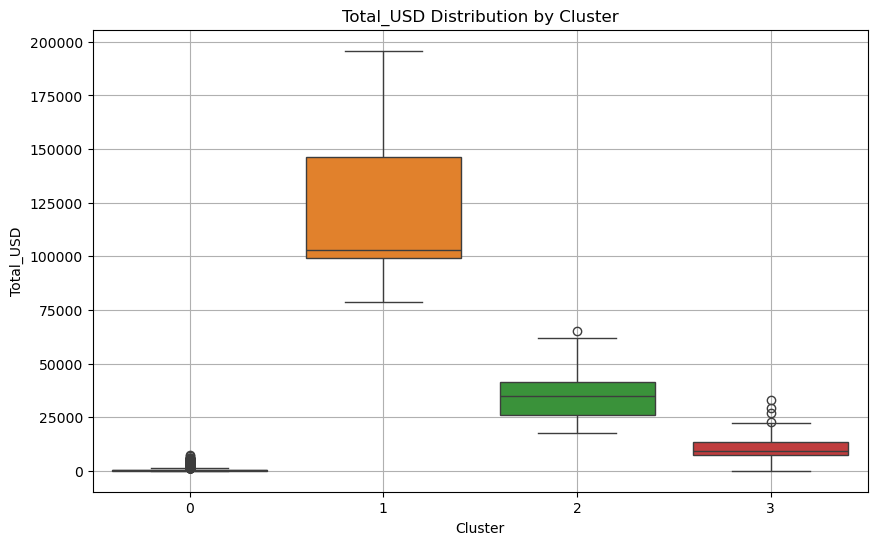

In [37]:
# Define save path
boxplot_usd_file = os.path.join(save_path, 'boxplot_totalUSD_by_cluster.png')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=invoice_clean, x='Cluster', y='Total_USD', palette='tab10')
plt.title('Total_USD Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total_USD')
plt.grid(True)
plt.savefig(boxplot_usd_file, dpi=300, bbox_inches='tight')
plt.show()


#### Cluster Interpretation

The scatterplot of `Total_USD` vs. `Total_Quantity` combined with the boxplots reveals four well-separated clusters based on customer value and order volume:

- **Cluster 0** (Blue – Bottom Left):
  - This is the largest cluster by count.
  - Consists of **low-value, low-quantity invoices**.
  - Likely represents small, infrequent orders, potentially from casual or low-budget customers, possibly local retailers or individual buyers.
  - Tight grouping in the scatterplot and very compressed values in the boxplot support this.

- **Cluster 1** (Orange – Top Right):
  - A small but very distinct group of **very high-value, high-quantity invoices**.
  - These are likely strategic, **bulk-purchasing customers**, such as international hotel chains, commercial clients, or key resellers.
  - Wide IQR and high median in the boxplots reinforce that this is a high-impact cluster despite its small size.

- **Cluster 2** (Green – Middle Right):
  - Represents **mid-to-high value and quantity orders**, spread across a moderate range.
  - Likely accounts for regular clients placing substantial but not top-tier orders, e.g., regional boutique hotels or mid-sized stockists.

- **Cluster 3** (Red – Middle Left):
  - Clustered between Cluster 0 and Cluster 2 in value and volume.
  - Contains **medium-low orders** with narrower spread.
  - May include customers transitioning from low to moderate purchasing activity, e.g., local wholesalers or smaller international partners.

### Insights:
- The clustering shows a strong, business-relevant stratification between customer types.
- Clusters may support future segmentation strategies (e.g., targeted offers).
- Cluster 1, though small, likely drives a disproportionately large share of revenue.


In [45]:
# Group by Cluster and compute summary stats
invoice_clean.groupby('Cluster').agg({
    'Total_USD': ['mean', 'median', 'min', 'max', 'std', 'count'],
    'Total_Quantity': ['mean', 'median', 'min', 'max', 'std', 'count']
}).round(2)


Total_USD                                                  \
              mean     median       min        max       std count   
Cluster                                                              
0           535.14     212.64      0.00    7159.89    865.22  4210   
1        124105.10  102722.40  78882.31  195880.81  42222.69     7   
2         35381.24   34726.81  17704.21   65275.00  11730.58    30   
3         10446.49    9425.00      1.63   32829.82   5024.40   203   

        Total_Quantity                                          
                  mean  median     min      max      std count  
Cluster                                                         
0                42.34     4.0     1.0    700.0    82.63  4210  
1              9831.00  8970.0  6342.0  14210.0  2715.36     7  
2              3184.40  2789.0  1701.0   7063.0  1379.03    30  
3               922.11   830.0   300.0   2406.0   409.82   203

### 5. Strategic Use of Clustering Results

The K-means clustering analysis produced four distinct invoice-based customer segments using only numerical features (`Total_USD`, `Total_Quantity`). These segments are well-separated visually and statistically, and align with meaningful business patterns.

#### Cluster Profiles:
- **Cluster 0** (Low-value/volume): 
  - Count: 4,210 invoices
  - Avg Value: $535 | Avg Quantity: 42
  - Represents small orders from casual or low-commitment customers
  - Likely local retailers, occasional buyers, or entry-level international clients

- **Cluster 1** (High-value strategic accounts): 
  - Count: 7 invoices
  - Avg Value: $124,105 | Avg Quantity: 9,831
  - Extremely high-value, high-volume clients, possibly major international hotels or distribution partners
  - Small group, but likely responsible for a large share of revenue

- **Cluster 2** (Mid-high clients): 
  - Count: 30 invoices
  - Avg Value: $35,381 | Avg Quantity: 3,184
  - Consistent, substantial orders from medium-scale buyers, e.g., boutique hotel chains or mid-sized international buyers

- **Cluster 3** (Mid-low clients): 
  - Count: 203 invoices
  - Avg Value: $10,446 | Avg Quantity: 922
  - Moderate orders that sit between small retail and major wholesale, potential growth segment

---

#### Applications for the Analytics Pipeline:

1. **Customer Segmentation**:
   - Convert invoice-level clusters into customer-level groupings for CRM, loyalty programs, or sales prioritisation.
   - Use Cluster 1 and Cluster 2 as models for high-value targeting.

2. **Marketing Strategy**:
   - Tailor communication: upsell Cluster 3 customers into Cluster 2 patterns.
   - Send budget product promos to Cluster 0; send premium catalogues to Cluster 1.

3. **Sales Forecasting**:
   - Create separate forecasting models per cluster to improve demand prediction accuracy (especially for volatile Cluster 1 vs. stable Cluster 0).

4. **Pricing & Discounting**:
   - Consider volume-based pricing tiers aligned with cluster behavior.
   - Evaluate discounting impact within clusters, especially for high-volume segments.

5. **Logistics & Fulfilment**:
   - Prioritise inventory planning and shipment optimization for large-batch clusters (1 & 2).
   - Offer different service levels based on segment expectations.

---

These results give Kevala Ceramics a concrete segmentation framework to guide international expansion, sales optimisation, and customer relationship strategy.


### 6. Further Analysis with Added Numeric Features

In [51]:
# Add derived feature: average price per item
invoice_clean['Avg_Price_Per_Item'] = invoice_clean['Total_USD'] / invoice_clean['Total_Quantity']

# Remove infinite or NaN values
invoice_clean = invoice_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['Avg_Price_Per_Item'])

# Preview
invoice_clean[['Total_USD', 'Total_Quantity', 'Avg_Price_Per_Item']].head()


,Total_USD,Total_Quantity,Avg_Price_Per_Item
0,7740.0,516.0,15.000000
1,2150.0,225.0,9.555556
2,1016.6,60.0,16.943333
3,596.5,50.0,11.930000
4,984.0,48.0,20.500000


In [55]:
# Add derived feature: quantity to value ratio
invoice_clean['Quantity_to_Value_Ratio'] = invoice_clean['Total_Quantity'] / invoice_clean['Total_USD']
invoice_clean = invoice_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['Quantity_to_Value_Ratio'])

In [57]:
invoice_ext.head()

,invoice_number,Date,Company_Name,Brand_Name,Total,Customer_Category,Trade_Type,Total_Quantity,Country,Total_USD
0,000030-024170-20240508-000447,2024-05-08,marina bay sands,MBS,7740.0,Hotel,Export,516.0,Singapore,7740.0
1,00003093043220250310000023,2025-03-10,"cprc (maldives) pvt, ltd (ritz carlton maldives)",Ritz Carlton Maldives,2150.0,Hotel,Export,225.0,Maldives,2150.0
2,004817#08010000025220250201000912,2025-02-01,al ghalia w.l.l,Jihad,1016.6,Agent,Export,60.0,Bahrain,1016.6
3,005/KEVALA/OUT/III/2024,2024-06-01,six senses amaala,Amaala,596.5,Hotel,Export,50.0,Saudi Arabia,596.5
4,006830#00003002238320250212043298,2025-02-13,renarte general trading llc,Renarte,984.0,Agent,Export,48.0,United Arab Emirates,984.0


In [59]:
# Calculate Order Density per Company_Name 

# Filter invoice_ext to match invoice_clean conditions (non-zero value and quantity)
invoice_ext_filtered = invoice_ext[
    (invoice_ext['Total_USD'] > 0) & (invoice_ext['Total_Quantity'] > 0)
].reset_index(drop=True)

# Convert 'Date' to datetime format
invoice_ext_filtered['Date'] = pd.to_datetime(invoice_ext_filtered['Date'])

# Calculate order activity per company
company_activity = invoice_ext_filtered.groupby('Company_Name').agg(
    Invoice_Count=('Date', 'count'),
    First_Date=('Date', 'min'),
    Last_Date=('Date', 'max')
).reset_index()

# Calculate active days and order density
company_activity['Active_Days'] = (company_activity['Last_Date'] - company_activity['First_Date']).dt.days + 1
company_activity['Order_Density'] = company_activity['Invoice_Count'] / company_activity['Active_Days']

# Merge 'Company_Name' into invoice_clean and attach Order_Density
invoice_clean = invoice_clean.merge(invoice_ext_filtered[['Company_Name']], left_index=True, right_index=True)
invoice_clean = invoice_clean.merge(company_activity[['Company_Name', 'Order_Density']], on='Company_Name', how='left')

# Final cleanup, remove missing or infinite values
invoice_clean = invoice_clean.replace([np.inf, -np.inf], np.nan).dropna(subset=['Order_Density'])


In [63]:
# Check output
invoice_clean[['Company_Name', 'Order_Density']].head(10)


,Company_Name,Order_Density
0,marina bay sands,0.005362
1,"cprc (maldives) pvt, ltd (ritz carlton maldives)",0.014252
2,al ghalia w.l.l,0.222222
3,six senses amaala,1.000000
4,renarte general trading llc,0.013333
5,al ghalia w.l.l,0.222222
6,anna kersova,1.000000
7,w hotel maldives,1.000000
8,waldorf astoria maldives ithaa fushi,0.017518
9,leisure oceans private limited (six sense kanu...,0.013554


In [65]:
# Check full df output
invoice_clean.head()

,Total_USD,Total_Quantity,Cluster,Avg_Price_Per_Item,Quantity_to_Value_Ratio,Company_Name,Order_Density
0,7740.0,516.0,3,15.000000,0.066667,marina bay sands,0.005362
1,2150.0,225.0,0,9.555556,0.104651,"cprc (maldives) pvt, ltd (ritz carlton maldives)",0.014252
2,1016.6,60.0,0,16.943333,0.059020,al ghalia w.l.l,0.222222
3,596.5,50.0,0,11.930000,0.083822,six senses amaala,1.000000
4,984.0,48.0,0,20.500000,0.048780,renarte general trading llc,0.013333


#### 6.1 Standardise Features for Clustering 

In [69]:
# Select the numeric features for clustering
features_for_clustering = invoice_clean[[
    'Total_USD',
    'Total_Quantity',
    'Avg_Price_Per_Item',
    'Quantity_to_Value_Ratio',
    'Order_Density'
]]

# Standardise the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Convert back to DataFrame for readability
features_scaled_df = pd.DataFrame(features_scaled, columns=features_for_clustering.columns)
features_scaled_df.head()


,Total_USD,Total_Quantity,Avg_Price_Per_Item,Quantity_to_Value_Ratio,Order_Density
0,0.986780,0.746015,-0.350244,-0.020045,-1.249343
1,0.114452,0.199117,-0.386680,-0.019891,-1.236493
2,-0.062417,-0.110980,-0.337239,-0.020076,-0.935863
3,-0.127974,-0.129774,-0.370789,-0.019975,0.188448
4,-0.067504,-0.133533,-0.313437,-0.020117,-1.237820


#### 6.2 Elbow Technique to Determine Optimal k

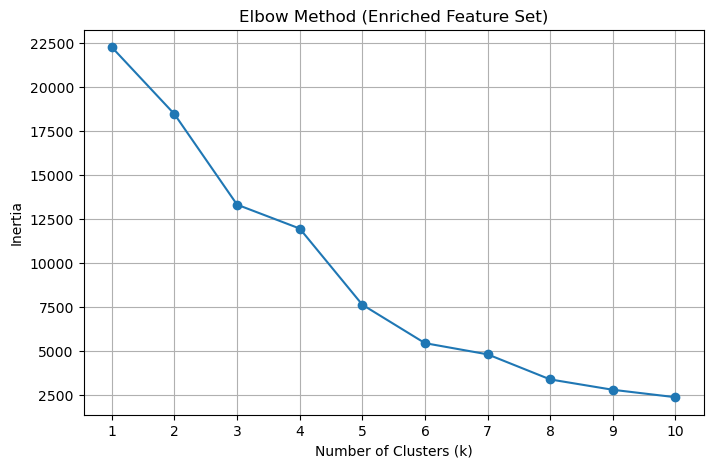

In [72]:
# Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot and Save
elbow_path_enriched = os.path.join(save_path, 'elbow_plot_enriched_features.png')

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method (Enriched Feature Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.savefig(elbow_path_enriched, dpi=300, bbox_inches='tight')
plt.show()


#### Interpretation
k = 7 strikes a balance:

- Still a meaningful drop in inertia from k=6

- Avoids overfitting compared to k=8–10

- More interpretable than splitting into too many micro-clusters

#### 6.3 k-Means Algorithm

In [80]:
# Fit kMeans
k = 7
kmeans_enriched = KMeans(n_clusters=k, random_state=42)
features_scaled_df['Cluster'] = kmeans_enriched.fit_predict(features_scaled_df)

# Attach cluster labels to invoice_clean
invoice_clean['Cluster'] = features_scaled_df['Cluster']

# Preview
invoice_clean[['Total_USD', 'Total_Quantity', 'Cluster']].head()


,Total_USD,Total_Quantity,Cluster
0,7740.0,516.0,6
1,2150.0,225.0,6
2,1016.6,60.0,6
3,596.5,50.0,0
4,984.0,48.0,6


In [82]:
# Check cluster distribution count
invoice_clean['Cluster'].value_counts().sort_index()


Cluster
0    2510
1     173
2       5
3     324
4       1
5      22
6    1415
Name: count, dtype: int64

#### Issues to Consider
- Clusters 2, 4, and 5 are extremely small

- Cluster 4 has only 1 row — likely an outlier

- Clusters 2 and 5 have < 25 rows combined

- This suggests over-segmentation, where K-means is trying to fit noise or edge cases

- Switch to 5 clusters instead

In [85]:
# Fit KMeans with k=5
kmeans_refined = KMeans(n_clusters=5, random_state=42)
features_scaled_df['Cluster'] = kmeans_refined.fit_predict(features_scaled_df)

# Assign new cluster labels to invoice_clean
invoice_clean['Cluster'] = features_scaled_df['Cluster']

# Check new distribution
invoice_clean['Cluster'].value_counts().sort_index()


Cluster
0    2683
1    1431
2      11
3     324
4       1
Name: count, dtype: int64

- Extreme outliers are affecting clusters
- Move on by removing outliers according to z-score

In [90]:
from scipy.stats import zscore

# Apply z-score filtering to remove rows with any extreme values
z_scores = features_scaled_df.drop(columns='Cluster').apply(zscore)
filtered_index = (z_scores.abs() < 3).all(axis=1)  # keep rows where all z-scores < 3

# Filter both datasets
features_scaled_filtered = features_scaled_df[filtered_index].drop(columns='Cluster')
invoice_clean_filtered = invoice_clean[filtered_index]


In [92]:
# Drop old cluster labels 
features_scaled = features_scaled_df.drop(columns='Cluster', errors='ignore')

# Calculate z-scores and filter rows where all features are within ±3 std dev
z_scores = features_scaled.apply(zscore)
filtered_index = (z_scores.abs() < 3).all(axis=1)

# Apply filtering to both feature and invoice datasets
features_scaled_filtered = features_scaled.loc[filtered_index].reset_index(drop=True)
invoice_clean_filtered = invoice_clean.loc[filtered_index].reset_index(drop=True)

# Re-run KMeans clustering
k = 5
kmeans_refined = KMeans(n_clusters=k, random_state=42)
features_scaled_filtered['Cluster'] = kmeans_refined.fit_predict(features_scaled_filtered)

# Attach new cluster labels to filtered invoice dataset
invoice_clean_filtered['Cluster'] = features_scaled_filtered['Cluster']

# Check final distribution
print(invoice_clean_filtered['Cluster'].value_counts().sort_index())


Cluster
0     734
1    1356
2     488
3    1579
4     174
Name: count, dtype: int64


#### 6.4 Visualising Clusters

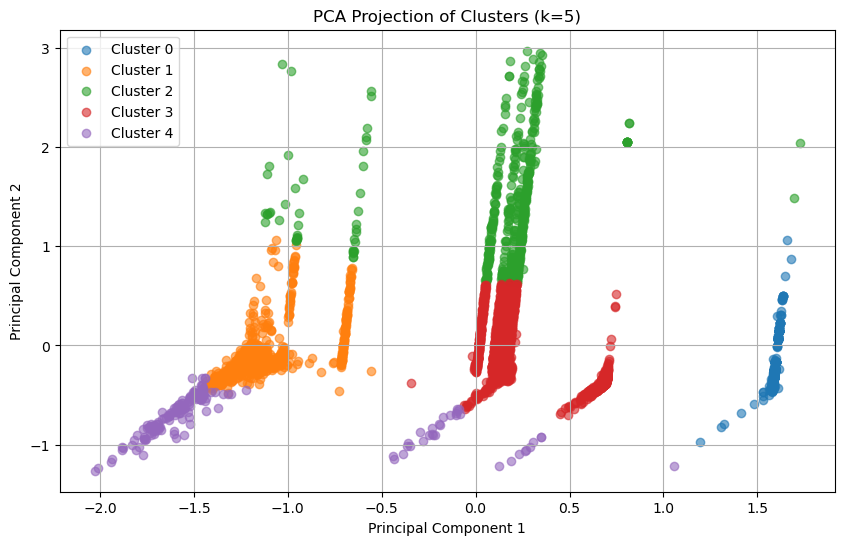

In [95]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(features_scaled_filtered.drop(columns='Cluster'))

# Add to DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = features_scaled_filtered['Cluster'].values

# Plot PCA results
plt.figure(figsize=(10, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('PCA Projection of Clusters (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Save visualisation
pca_plot_path = os.path.join(save_path, 'pca_cluster_plot_k5.png')
plt.savefig(pca_plot_path, dpi=300, bbox_inches='tight')
plt.show()


In [97]:
# Show PCA loadings (contributions of each feature to PC1 and PC2)
loadings = pd.DataFrame(
    pca.components_.T,
    index=features_scaled_filtered.columns[:-1],  # exclude 'Cluster' column
    columns=['PC1', 'PC2']
).round(3)

# Display
loadings


,PC1,PC2
Total_USD,-0.129,-0.151
Total_Quantity,-0.132,-0.217
Avg_Price_Per_Item,0.058,0.958
Quantity_to_Value_Ratio,0.000,-0.001
Order_Density,0.981,-0.106


#### PCA Cluster Plot Interpretation

The PCA projection compresses our 5-feature space into two key components:

- **PC1 (x-axis)** is dominated by `Order_Density` → it captures how **frequently** a customer places orders.
- **PC2 (y-axis)** is driven by `Avg_Price_Per_Item` → it reflects whether purchases are **premium-priced** or **bulk/economical**.

#### Interpretation:
- Clusters far **right** on PC1 = high-frequency buyers; far **left** = occasional or one-time buyers.
- Clusters high on PC2 = premium product buyers; low = price-sensitive or bulk orders.
- This separation helps identify **customer types by behaviour**, not just volume or value.


C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3350729250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')


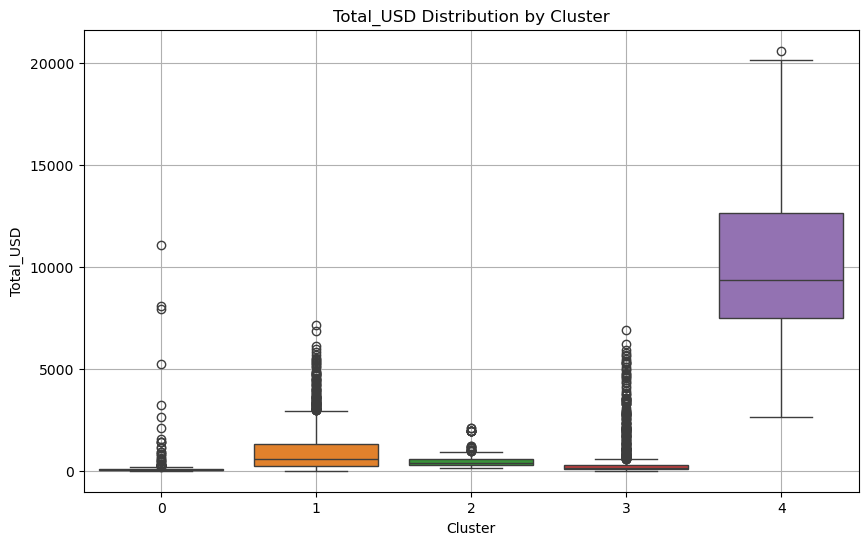

C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3350729250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')


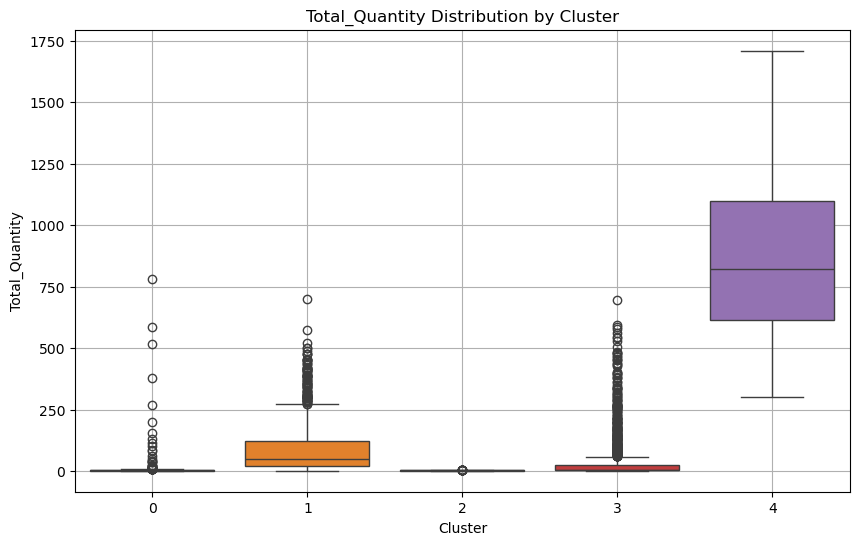

C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3350729250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')


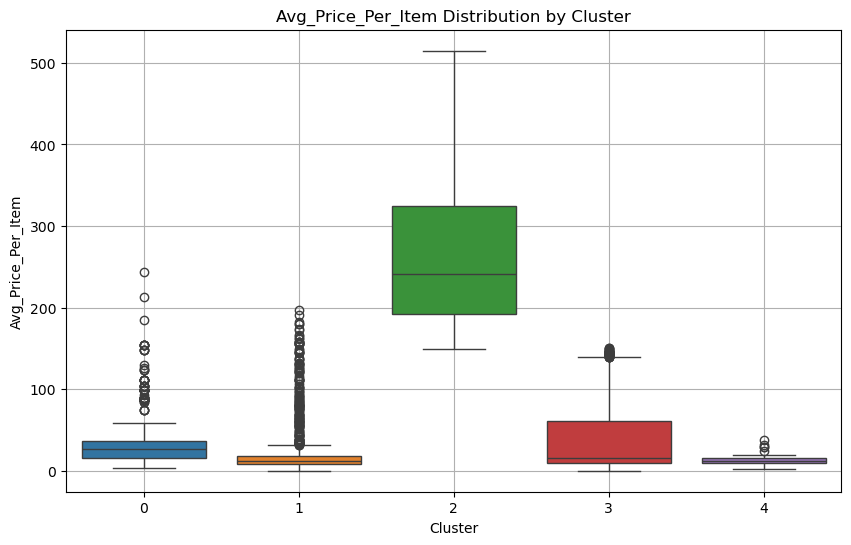

C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3350729250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')


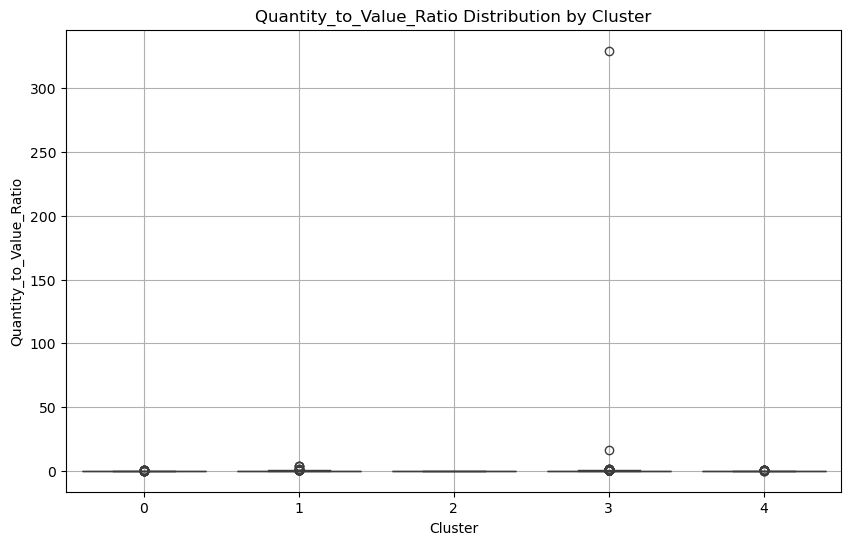

C:\Users\daxma\AppData\Local\Temp\ipykernel_7700\3350729250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')


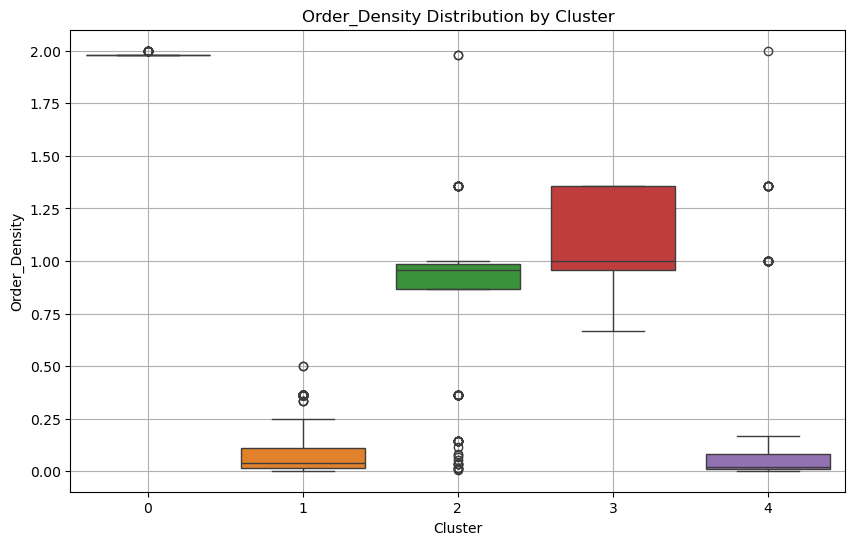

In [103]:
# List of features to plot
features_to_plot = [
    'Total_USD',
    'Total_Quantity',
    'Avg_Price_Per_Item',
    'Quantity_to_Value_Ratio',
    'Order_Density'
]

# Create and save one boxplot per feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=invoice_clean_filtered, x='Cluster', y=feature, palette='tab10')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    
    # Save plot
    filename = f'boxplot_{feature}_by_cluster.png'
    filepath = os.path.join(save_path, filename)
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()


#### Cluster Profile Summary (Boxplot Insights)

Each cluster represents a distinct purchasing behavior, based on Total Value, Quantity, Frequency, and Pricing:

- **Cluster 0**: Low value and quantity, but very high order frequency. Likely small, frequent buyers (e.g., local shops).
- **Cluster 1**: Infrequent but moderately large purchases. Represents bulk-order clients like hotels or distributors.
- **Cluster 2**: Low quantity and value, but very high price per item. Indicates premium buyers focused on high-end products.
- **Cluster 3**: Mid-range value, quantity, and high order frequency. Likely steady, recurring customers (e.g., mid-size repeat buyers).
- **Cluster 4**: Very high value and quantity, but low frequency. Likely strategic bulk orders.

These insights help define buyer personas and guide tailored marketing, pricing, and relationship strategies.


#### 6.5 Summary Stats

In [110]:
# Group by Cluster and compute summary stats, display with horizontal scroll bar
invoice_clean_filtered.groupby('Cluster').agg({
    'Total_USD': ['mean', 'median', 'min', 'max', 'std', 'count'],
    'Total_Quantity': ['mean', 'median', 'min', 'max', 'std', 'count'],
    'Avg_Price_Per_Item': ['mean', 'median', 'min', 'max', 'std'],
    'Quantity_to_Value_Ratio': ['mean', 'median', 'min', 'max', 'std'],
    'Order_Density': ['mean', 'median', 'min', 'max', 'std']
}).round(2).style.set_table_attributes("style='display:inline; overflow-x:auto'").set_sticky()


#### Cluster Summary (Descriptive Statistics)

Each cluster shows distinct patterns based on value, volume, price, and frequency:

- **Cluster 0**: Low-value, low-quantity invoices with very high frequency. Likely small, recurring buyers such as local shops or retailers.
- **Cluster 1**: Moderate value and quantity with low frequency. Represents infrequent bulk buyers, likely hotel chains or distributors.
- **Cluster 2**: High price per item, low quantity, mid-range value, and frequent ordering. Indicates premium clients such as boutique hotels.
- **Cluster 3**: Low-mid value and quantity with high frequency. Suggests stable, recurring customers, possibly regional hospitality venues.
- **Cluster 4**: Very high value and quantity with low frequency. Reflects strategic bulk orders tied to large projects, openings, or international stockists.

These insights support tailored segmentation for sales, marketing, and supply strategy.


#### 6.6 Use Cases for Clustering Results in Future Analytics

These customer segments can drive multiple next steps:

- **Targeted Marketing**: Tailor outreach by buyer behaviour (e.g., premium vs. bulk vs. frequent).
- **Sales Forecasting**: Model demand patterns separately by cluster type.
- **CRM Strategy**: Prioritise strategic or high-frequency clients with custom service levels.
- **CLV Modeling**: Use cluster traits to forecast lifetime value and retention risk.
- **Market Expansion**: Map cluster types to countries to guide regional strategy.
- **Logistics Optimisation**: Align production and shipping with cluster-specific demand.

These insights create a data-driven foundation for commercial growth and operational planning.


### 7. Export Dataframes

In [118]:
# Define base path for saving
base_path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis\02 Data\Prepared Data\6.5'

# Export invoice-level data with cluster labels
invoice_clean_filtered.to_csv(os.path.join(base_path, 'invoice_clean_filtered_with_clusters.csv'), index=False)

# Export scaled features with cluster labels
features_scaled_filtered.to_csv(os.path.join(base_path, 'features_scaled_with_clusters.csv'), index=False)

# Export final cluster summary stats
cluster_summary.to_csv(os.path.join(base_path, 'cluster_summary_statistics.csv'), index=False)
